In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

**DICTIONARY**

- id          : Airbnb's unique identifier for the listing. 
- name        : Name of the listing. 
- host_id     : Airbnb's unique identifier for the host/user. 
- host_name   : Name of the host. Usually, just the first name(s). 
- neighborhood: The neighborhood is geocoded using the latitude and longitude against neighborhoods as defined by open or public digital shapefiles.
- latitude    : Uses the World Geodetic System (WGS84) projection for latitude.
- longitude   : Uses the World Geodetic System (WGS84) projection for longitude.
- room_type   : [Entire home/apt |Private room| Shared room| Hotel]
    All homes are grouped into the following three room types:

    <font color='orange'>_Entire place (Apartement)_
    - Entire places are best if you're seeking a home away from home. With an entire place, you'll have the whole space to yourself. This usually includes a bedroom, a bathroom, a kitchen, and a separate, dedicated entrance. Hosts should note in the description if they'll be on the property or not (ex: "Host occupies the first floor of the home") and provide further details on the listing.
    
    _Private rooms_
    - Private rooms are great for when you prefer a little privacy, and still value a local connection. When you book a private room, you'll have your private room for sleeping and may share some spaces with others. You might need to walk through indoor spaces that another host or guest may occupy to get to your room.

    _Hotel rooms_
    - Whether private or shared, hotel rooms provide a level of service and hospitality associated with traditional hotels. The rooms are available in boutique or lifestyle hotels, hostels, bed and breakfasts, or similar properties. They typically include vibrant common areas and rooms with unique touches.

    _Shared rooms_ 
    - Shared rooms are for when you don't mind sharing a space with others. When you book a shared room, you'll be sleeping in a space that is shared with others and share the entire space with other people. Shared rooms are popular among flexible travelers looking for new friends and budget-friendly
    stays.</font>
- minimum_nights      : The minimum number of night stays for the listing (calendar rules may differ).
- number_of_reviews   : The number of reviews the listing has. 
- last_review         : The date of the last/newest review. calculated_host_listings_count : The number of listings the host has in the current scrape in the city/region geography.
- availability_365    : Avaliability_x. The calendar determines the availability of the listing x days in the future. Note a listing may be available because it has been booked by a guest or blocked by the host.
- number_of_reviews_ltm : The number of reviews the listing has (in the last 12 months).



LATAR BELAKANG
- Perusahaan AIR BnB cabang Bangkok, yang bergerak di bidang penyewaan properti hunian sementara, merekrut seorang ahli data science untuk menemukan masalah-masalah yang ditemukan melalui data listing Bangkok. Hal ini digunakan **CMO (Chief Marketing Officer)** untuk meningkatkan rating aplikasi sehingga dapat mengungguli perusahaan kompetitor sekaligus ingin mengetahui strategi pemasaran apa yang dapat digunakan untuk meningkatkan daya tarik penyewa pada berbagai tipe properti.

**HIPOTESIS MASALAH:**

1. Beberapa listing ada yang tidak memiliki nama penginapan, dan aplikasi memperbolehkan hal itu
2. Terdapat beberapa penginapan yang availability 0, yang artinya tidak bisa di sewa
3. Terdapat data duplikat yang menyebabkan user/pengguna akan mengalami miss data
4. Terjadinya penurunan jumlah review pada tahun 2021 dengan sangat signifikan
5. Terdapat properti yang memiliki jumlah ulasan yangs sedikit namun jumlah propertinya banyak

In [3]:
data=pd.read_csv('Airbnb Listings Bangkok.csv')
data

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.759830,100.541340,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,NaN,NaN,1,365,0
3,3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.788230,100.572560,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,NaN,NaN,3,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,NaN,1,362,0
15850,15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,NaN,14,365,0
15851,15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0
15852,15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0


___

# _CLEANING_

___

In [4]:
# data unik di tiap kolom
listItem = []
for col in data.columns :
    listItem.append( [col, data[col].nunique(), data[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,Unnamed: 0,15854,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
1,id,15854,"[27934, 27979, 28745, 35780, 941865, 1704776, ..."
2,name,14794,"[Nice room with superb city view, Easy going l..."
3,host_id,6659,"[120437, 120541, 123784, 153730, 610315, 21296..."
4,host_name,5313,"[Nuttee, Emy, Familyroom, Sirilak, Kasem, Wimo..."
5,neighbourhood,50,"[Ratchathewi, Bang Na, Bang Kapi, Din Daeng, B..."
6,latitude,9606,"[13.75983, 13.66818, 13.75232, 13.78823, 13.76..."
7,longitude,10224,"[100.54134, 100.61674, 100.62402, 100.57256, 1..."
8,room_type,4,"[Entire home/apt, Private room, Hotel room, Sh..."
9,price,3040,"[1905, 1316, 800, 1286, 1000, 1558, 1461, 700,..."


In [5]:
# Mengecek nilai NaN

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      15854 non-null  int64  
 1   id                              15854 non-null  int64  
 2   name                            15846 non-null  object 
 3   host_id                         15854 non-null  int64  
 4   host_name                       15854 non-null  object 
 5   neighbourhood                   15854 non-null  object 
 6   latitude                        15854 non-null  float64
 7   longitude                       15854 non-null  float64
 8   room_type                       15854 non-null  object 
 9   price                           15854 non-null  int64  
 10  minimum_nights                  15854 non-null  int64  
 11  number_of_reviews               15854 non-null  int64  
 12  last_review                     

In [6]:
# Mengecek data type setiap kolom

data.isna().sum()

Unnamed: 0                           0
id                                   0
name                                 8
host_id                              0
host_name                            0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5790
reviews_per_month                 5790
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

In [7]:
# Menghapus kolom Unnamed:0 karena kolom ini sama dengan indeks

data.drop('Unnamed: 0',axis=1,inplace=True)

In [8]:
# Membuat kolom baru (last_review (Year) untuk memudahkan membuat grafik time series)

data['last_review (Year)']=data['last_review'].apply(lambda x: str(x)[:4])

In [9]:
# Mengganti data type kolom last_review dan last_review (Year) menjadi date time

data['last_review']=pd.to_datetime(data['last_review'])
data['last_review (Year)']=pd.to_datetime(data['last_review (Year)'])

In [10]:
# Data type kolom last review sudah berubah menjadi date time

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              15854 non-null  int64         
 1   name                            15846 non-null  object        
 2   host_id                         15854 non-null  int64         
 3   host_name                       15854 non-null  object        
 4   neighbourhood                   15854 non-null  object        
 5   latitude                        15854 non-null  float64       
 6   longitude                       15854 non-null  float64       
 7   room_type                       15854 non-null  object        
 8   price                           15854 non-null  int64         
 9   minimum_nights                  15854 non-null  int64         
 10  number_of_reviews               15854 non-null  int64         
 11  la

# Mengecek data duplicate

Pemilihan kolom longitude dan latitude karena letak geografis suatu bangunan tidak mungkin sama
- Kemudian di filter berdasarkan room type nya ternyata ada type room yang 'private room' yang artinya 1 rumah dengan kamar yang banyak dikontrakan dengan nama yang berbeda yang artinya beda properti
- Untuk menanggulangi hal tersebut harus difilter lagi melalui last_review, price, dan name karena ketika 3 kolom tersebut sama dapat dipastikan properti yang didaftarkan untuk di rent merupakan properti yang sama.

In [11]:
data_duplicate = data[data.duplicated(subset=['longitude', 'latitude','last_review','price','name','room_type'])]
display(len(data_duplicate))
data_duplicate


14

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,last_review (Year)
5976,28907857,NA BANGLAMPOO GUEST HOUSE,87704107,Yui,Phra Nakhon,13.762790,100.497900,Private room,1400,1,0,NaT,NaN,9,361,0,NaT
8790,37954129,small1,97598307,Soo,Don Mueang,13.920720,100.575780,Shared room,350,1,0,NaT,NaN,4,180,0,NaT
15121,767128654727724698,Sathon Luxury Loft/China Town/Icon Siam,276781306,Alex,Sathon,13.710777,100.519891,Entire home/apt,1580,1,0,NaT,NaN,13,339,0,NaT
15144,767945912006659422,Sathon Luxury Loft/China Town/Icon Siam,344327171,Alice,Sathon,13.710777,100.519891,Entire home/apt,1580,1,0,NaT,NaN,40,339,0,NaT
15186,765691389894680033,Sathon Luxury 2 br/China Town/Icon Siam,264864968,Tricia,Sathon,13.710777,100.519891,Entire home/apt,2221,1,0,NaT,NaN,44,340,0,NaT
15190,765716244664642439,Sathon Luxury 2 br/China Town/Icon Siam,344327171,Alice,Sathon,13.710777,100.519891,Entire home/apt,2221,1,0,NaT,NaN,40,340,0,NaT
15191,765721954905526928,Sathon Luxury 2 br/China Town/Icon Siam,344327171,Alice,Sathon,13.710777,100.519891,Entire home/apt,2221,1,0,NaT,NaN,40,340,0,NaT
15192,765728211212001811,Sathon Luxury 2 br/China Town/Icon Siam,276781306,Alex,Sathon,13.710777,100.519891,Entire home/apt,2221,1,0,NaT,NaN,13,340,0,NaT
15195,765781484209218358,Sathon Luxury 2 br/China Town/Icon Siam,20133201,Willam,Sathon,13.710777,100.519891,Entire home/apt,2221,1,0,NaT,NaN,33,340,0,NaT
15371,775777794097427183,New! Gateway/ Bangkok University 1BR 2PPL near...,52161947,Noons,Khlong Toei,13.716669,100.584967,Entire home/apt,2976,1,0,NaT,NaN,99,362,0,NaT


In [12]:
# Mengedrop data duplikat

# data.drop_duplicates(subset=['longitude', 'latitude','last_review','price','name','room_type'], keep='first', inplace=True, ignore_index=False)

#Data duplikat akan di drop setelah selesai di analisis

In [13]:
# Mengisi nilai NaN pada kolom reviews_per_month menjadi 0

data['reviews_per_month'].fillna(value=0,inplace=True)

In [14]:
# Melihat nilai NaN

data.isna().sum()

id                                   0
name                                 8
host_id                              0
host_name                            0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5790
reviews_per_month                    0
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
last_review (Year)                5790
dtype: int64

In [15]:
# Menampilkan kolom name yang memiliki nilai NaN

data[data['name'].isna()]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,last_review (Year)
439,4549768,NaN,18852579,Titawan,Phra Khanong,13.69406,100.59619,Private room,1080,5,0,NaT,0.00,1,365,0,NaT
544,4720818,NaN,24386225,Cherry,Din Daeng,13.77562,100.57346,Private room,1200,1,0,NaT,0.00,1,365,0,NaT
572,4245018,NaN,22030043,Parichart,Bang Phlat,13.78376,100.49821,Private room,1200,1,0,NaT,0.00,1,365,0,NaT
669,6148415,NaN,31895202,Chira,Bang Na,13.68276,100.60894,Entire home/apt,2424,2,0,NaT,0.00,1,365,0,NaT
1030,8055144,NaN,42521288,Nantida,Vadhana,13.74126,100.55761,Private room,5000,3,0,NaT,0.00,1,365,0,NaT
1282,10000742,NaN,51374914,Diamond Bangkok,Ratchathewi,13.75328,100.52928,Private room,930,1,6,2017-05-13,0.07,1,365,0,2017-01-01
1594,10710165,NaN,55347997,Khaneungnit,Vadhana,13.71757,100.60464,Private room,1000,1,0,NaT,0.00,1,365,0,NaT
2075,13142743,NaN,73275200,Pakaphol,Khlong Toei,13.72566,100.56416,Private room,850,1,2,2017-12-11,0.03,3,220,0,2017-01-01


In [16]:
# MENCARI PROPERTI MILIKI PAKAPHOL YANG LAIN

data[data['host_name']=='Pakaphol']

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,last_review (Year)
1981,13400326,Errday Guest House,73275200,Pakaphol,Khlong Toei,13.72427,100.56443,Private room,950,1,1,2020-02-19,0.03,3,1,0,2020-01-01
1982,13400758,Errday Guest House,73275200,Pakaphol,Khlong Toei,13.72373,100.56415,Private room,36363,1,0,NaT,0.00,3,1,0,NaT
2075,13142743,NaN,73275200,Pakaphol,Khlong Toei,13.72566,100.56416,Private room,850,1,2,2017-12-11,0.03,3,220,0,2017-01-01


Terdapat 8 baris data yang memiliki nilai NaN di kolom name
- 5 diantaranya memiliki dimiliki oleh host berbeda dan masing-masing hanya 1 properti sehingga tidak dapat dicek kepemilikan properti yang lain.
- 1 diantaranya memiliki jumlah review 6, tapi ini harus dianalisis karena nama hotelnya tidak ada tetapi user bisa percaya untuk memesan
- 1 diantaranya memiliki properti yang lebih dari 1 sehingga bisa di cek, dan ternyata 2 properti lainnya memiliki nama penginapan yang sama sehingga nama hotel NaN ini diganti dengan nama hotel yang sudah ada tersebut.

In [17]:
# Mengganti nilai NaN pada host_name yang bernama pakaphol

data.loc[data['host_name']=='Pakaphol', 'name'] = data.loc[data['host_name']=='Pakaphol', 'name'].fillna('Errday Guest House')

In [18]:
# Mengecek nilai NaN setelah diganti

data[data['host_name']=='Pakaphol']

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,last_review (Year)
1981,13400326,Errday Guest House,73275200,Pakaphol,Khlong Toei,13.72427,100.56443,Private room,950,1,1,2020-02-19,0.03,3,1,0,2020-01-01
1982,13400758,Errday Guest House,73275200,Pakaphol,Khlong Toei,13.72373,100.56415,Private room,36363,1,0,NaT,0.00,3,1,0,NaT
2075,13142743,Errday Guest House,73275200,Pakaphol,Khlong Toei,13.72566,100.56416,Private room,850,1,2,2017-12-11,0.03,3,220,0,2017-01-01


In [19]:
# Kolom name yang masih memiliki nilai NaN tidak di drop karena hal ini akan menjadi salah satu permasalahan yang akan dibahas di analisis

# data.dropna(subset=['name'],inplace=True)

# Membuat kolom price per night
Asumsi sebelumnya, kolom price yang ada pada data ini merupakan hasil perkalian dari price per night dengan minimum night sehingga perlu dibuat kolom baru untuk menampilkan harga per night. Namun, setelah dilihat pada data, banyak sekali harga yang tidak masuk akal (sangat murah) jika mengasumsikan price  merupakan hasil perkalian dengan mininum night, oleh sebab itu price yang ada di data ditetapkan menjadi price per night.

**CATATAN**
- 1 baht=Rp 429,88 (kurs tanggal 9/6/2023)
- Harga maksimal yang masuk akal untuk per malamnya adalah 20 juta rupiah atau sekitar 46524 baht
- Harga minimal yang masuk akal untuk per malamnya adalah 50 ribu rupiah atau sekitar 116 baht

In [20]:
data['price_per_night']=data['price']/data['minimum_nights']

In [21]:
#Menampilkan properti diatas harga maksimal
harga_maksimal=data[data['price']>46524]
# display(harga_maksimal)
print(f'Jumlah properti yang memiliki harga diatas harga maksimal sebanyak {len(harga_maksimal)}')

Jumlah properti yang memiliki harga diatas harga maksimal sebanyak 63


In [22]:
harga_minimal=data[data['price_per_night']<116]
# display(harga_minimal)
print(f'Jumlah properti yang memiliki harga diatas harga maksimal sebanyak {len(harga_minimal)}')

Jumlah properti yang memiliki harga diatas harga maksimal sebanyak 3426


In [23]:
# DROP KOLOM PRICE PER NIGHT

data.drop(columns='price_per_night',axis=1,inplace=True)

In [24]:
# Mendeteksi kolom yang memilki nilai 0

for column in data.columns:
    if 0 in data[column].values:
        print(f"Kolom {column} memiliki nilai 0.")


Kolom price memiliki nilai 0.
Kolom number_of_reviews memiliki nilai 0.
Kolom reviews_per_month memiliki nilai 0.
Kolom availability_365 memiliki nilai 0.
Kolom number_of_reviews_ltm memiliki nilai 0.


In [25]:
# Drop price yang memilki nilai 0 karena termasuk anomali (harga penginapan tidak mungkin di setting 0)

data.drop(data[data['price'] == 0].index, inplace=True)


In [26]:
# Mendeteksi kolom yang memilki nilai 0, setelah di drop

for column in data.columns:
    if 0 in data[column].values:
        print(f"Kolom {column} memiliki nilai 0.")

Kolom number_of_reviews memiliki nilai 0.
Kolom reviews_per_month memiliki nilai 0.
Kolom availability_365 memiliki nilai 0.
Kolom number_of_reviews_ltm memiliki nilai 0.


# Melihat Outliers

<Axes: xlabel='price', ylabel='room_type'>

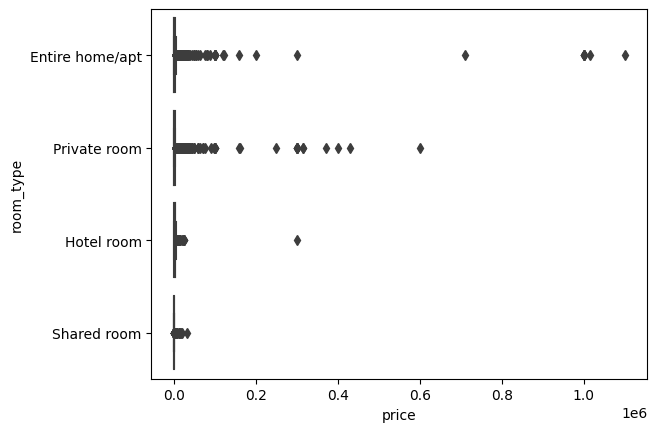

In [27]:
sns.boxplot(data=data,x='price',y='room_type')

**ANALISIS**

Dari grafik boxplot diatas, dapat dilihat ada outliers pada harga properti antire home/apart, private room, dan hotel room. Ini dikarenakan ada harga yang sangat tinggi, namun karena pada kasus ini merupakan listing penginapan yang berarti harga dari penginapan terus dapat di setting sendiri berdasarkan keinginan pemilik properti, sehingga penghapusan data outlier tidak dibutuhkan.

# Membuat DataFrame baru per model_type

In [28]:
df_apart=data[data['room_type']=='Entire home/apt'].sort_values('price',ascending=False)
df_private=data[data['room_type']=='Private room'].sort_values('price',ascending=False)
df_hotel=data[data['room_type']=='Hotel room'].sort_values('price',ascending=False)
df_shared=data[data['room_type']=='Shared room'].sort_values('price',ascending=False)

# display(df_apart.head())
# display(df_private.head())
# display(df_hotel.head())
# display(df_shared.head())


# **ANALISIS**

___

# **1. Terdapat Data Duplikat**

In [29]:
data_duplicate = data[data.duplicated(subset=['longitude', 'latitude','last_review','price','name','room_type'])]
display(data_duplicate)
print(f'Jumlah properti yang sama adalah {len(data_duplicate)} properti')

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,last_review (Year)
5976,28907857,NA BANGLAMPOO GUEST HOUSE,87704107,Yui,Phra Nakhon,13.762790,100.497900,Private room,1400,1,0,NaT,0.0,9,361,0,NaT
8790,37954129,small1,97598307,Soo,Don Mueang,13.920720,100.575780,Shared room,350,1,0,NaT,0.0,4,180,0,NaT
15121,767128654727724698,Sathon Luxury Loft/China Town/Icon Siam,276781306,Alex,Sathon,13.710777,100.519891,Entire home/apt,1580,1,0,NaT,0.0,13,339,0,NaT
15144,767945912006659422,Sathon Luxury Loft/China Town/Icon Siam,344327171,Alice,Sathon,13.710777,100.519891,Entire home/apt,1580,1,0,NaT,0.0,40,339,0,NaT
15186,765691389894680033,Sathon Luxury 2 br/China Town/Icon Siam,264864968,Tricia,Sathon,13.710777,100.519891,Entire home/apt,2221,1,0,NaT,0.0,44,340,0,NaT
15190,765716244664642439,Sathon Luxury 2 br/China Town/Icon Siam,344327171,Alice,Sathon,13.710777,100.519891,Entire home/apt,2221,1,0,NaT,0.0,40,340,0,NaT
15191,765721954905526928,Sathon Luxury 2 br/China Town/Icon Siam,344327171,Alice,Sathon,13.710777,100.519891,Entire home/apt,2221,1,0,NaT,0.0,40,340,0,NaT
15192,765728211212001811,Sathon Luxury 2 br/China Town/Icon Siam,276781306,Alex,Sathon,13.710777,100.519891,Entire home/apt,2221,1,0,NaT,0.0,13,340,0,NaT
15195,765781484209218358,Sathon Luxury 2 br/China Town/Icon Siam,20133201,Willam,Sathon,13.710777,100.519891,Entire home/apt,2221,1,0,NaT,0.0,33,340,0,NaT
15371,775777794097427183,New! Gateway/ Bangkok University 1BR 2PPL near...,52161947,Noons,Khlong Toei,13.716669,100.584967,Entire home/apt,2976,1,0,NaT,0.0,99,362,0,NaT


Jumlah properti yang sama adalah 14 properti


In [30]:
data_duplicate.groupby(['name','latitude','longitude','host_name'])[['id']].count()

id
name                                               latitude  longitude  host_name    
Family Room for 4 People                           13.740168 100.556320 Rachan      1
Luxury 1 Bed/Central Rama9/Jodds Fair/Phra ram9    13.756184 100.568269 Tricia      1
                                                                        Willam      1
                                                   13.757097 100.568486 Alice       1
NA BANGLAMPOO GUEST HOUSE                          13.762790 100.497900 Yui         1
New! Gateway/ Bangkok University 1BR 2PPL near BTS 13.716669 100.584967 Noons       1
Sathon Luxury 2 br/China Town/Icon Siam            13.710777 100.519891 Alex        1
                                                                        Alice       2
                                                                        Tricia      1
                                                                        Willam      1
Sathon Luxury Loft/China Town/Icon Siam            13.710777 100.519891 Alex        1
                                                                        Alice       1
small1                                             13.920720 100.575780 Soo         1

**ANALISIS**

Pada data duplikat diatas dapat dilihat, dengan nama yang sama sekaligus memiliki latitude dan longtitude sama ternyata didaftarkan dengan nama yang berbeda. Padahal properti tesebut merupakan properti yang sama, dibuktikan dengan harga, last review, dan jenis properti yang sama. Hal ini akan membuat penyewa mengalami miss booking, yang artinya ketika 1 orang sudah booking di 1 properti, dan ketika orang lain akan membooking properti yang sama tersebut, karena properti tersebut terdapat 2 (padahal hanya 1) di aplikasi maka 1 properti yang lain akan tertulis masih kosong dan dapat di sewa padahal properti tersebut sudah di sewa.

Masalah ini benar terjadi yang dibuktikan dengan complain yang tertulis di ulasan Google Play yang mengatakan, jika mereka sudah memesan dan membayar harga sewa namun ketika sampai disana properti tersebut telah disewakan.

In [31]:
# Drop Data Duplicate

data.drop_duplicates(subset=['longitude', 'latitude','last_review','price','name','room_type'], keep='first', inplace=True, ignore_index=False)

# **2. Mengecek nilai NaN pada kolom name**

In [32]:
data_name_null=data[data['name'].isnull()]
data_name_null

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,last_review (Year)
439,4549768,NaN,18852579,Titawan,Phra Khanong,13.69406,100.59619,Private room,1080,5,0,NaT,0.00,1,365,0,NaT
544,4720818,NaN,24386225,Cherry,Din Daeng,13.77562,100.57346,Private room,1200,1,0,NaT,0.00,1,365,0,NaT
572,4245018,NaN,22030043,Parichart,Bang Phlat,13.78376,100.49821,Private room,1200,1,0,NaT,0.00,1,365,0,NaT
669,6148415,NaN,31895202,Chira,Bang Na,13.68276,100.60894,Entire home/apt,2424,2,0,NaT,0.00,1,365,0,NaT
1030,8055144,NaN,42521288,Nantida,Vadhana,13.74126,100.55761,Private room,5000,3,0,NaT,0.00,1,365,0,NaT
1282,10000742,NaN,51374914,Diamond Bangkok,Ratchathewi,13.75328,100.52928,Private room,930,1,6,2017-05-13,0.07,1,365,0,2017-01-01
1594,10710165,NaN,55347997,Khaneungnit,Vadhana,13.71757,100.60464,Private room,1000,1,0,NaT,0.00,1,365,0,NaT


# **Proporsi per tipe properti**

In [33]:
data_name=data_name_null.groupby('room_type').size()
data_name

room_type
Entire home/apt    1
Private room       6
dtype: int64

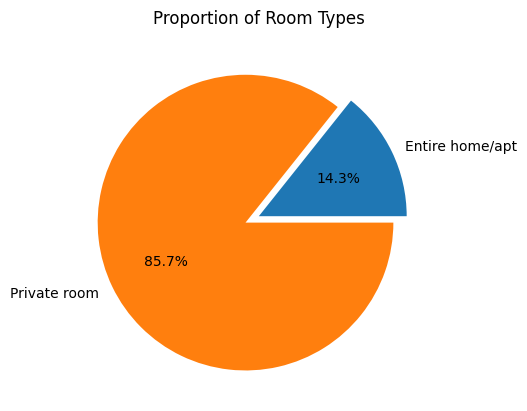

In [34]:
explode=[0.0,0.1]

plt.pie(data_name, labels=data_name.index, autopct='%1.1f%%',explode=explode)
plt.title('Proportion of Room Types')
plt.show()


# **Perbandingan data yang memiliki nilai NaN pada kolom name dengan data keseluruhan**

In [35]:
data_nan_930=(data[(data['price']<=930)&(data['neighbourhood']=='Ratchathewi')&(data['room_type']=='Private room')])
data_normal=(data[(data['room_type']=='Private room')|(data['neighbourhood']=='Ratchathewi')])

# Membuat tabel perbandingan
comparison_table = pd.DataFrame({
    'Jenis Data': ['data_nan_930', 'data_normal'],
    'Jumlah Properti': [len(data_nan_930), len(data_normal)]
})

display(comparison_table)

,Jenis Data,Jumlah Properti
0,data_nan_930,69
1,data_normal,6555


Informasi:
1. Harga properti yang lebih rendah atau sama dengan 930 baht hanya ada 69 penginapan dari total 6555 properti
2. Kawasan Ratchathewi terletak di pusat kota Bangkok dan terdapat pusat perbelanjaan terkenal seperti Siam Paragon dan MBK Center, serta institusi pendidikan terkemuka seperti Universitas Chulalongkor, informasi didapatkan [disini.](https://www.sansiri.com/cnt/news/phaya-thai-ratchathewi-a-vibrant-town-in-the-centre-of-bangkok-267/)

ANALISIS

- Pada properti yang tidak memiliki nama ternyata terdapat satu properti yang memiliki review, yang artinya walaupun tidak memiliki nama tetapi karena harga nya relatif murah pada kawasan tersebut ternyata tetap memiliki nilai kepercayaan sehingga ada yang tertarik untuk menyewanya.
-  Namun, untuk 6 penginapan lainnya ternyata sama sekali tidak menarik penyewa karena harganya yang lebih mahal serta lokasi dari penginapan tersebut tidak terletak di pusat kota, ditambah tidak adanya nama penginapan sehingga tingkat kepercayaan untuk menyewa properti tersebut rendah.

# **3.Penginapan yang availability 0, yang artinya tidak bisa di sewa**

In [36]:
data_availability_0=data[(data['availability_365']==0)&(data['last_review'].notnull())]
display(data_availability_0)
display(f'Total properti yang availability nya 0 berjumlah {(data_availability_0["id"].count())}')

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,last_review (Year)
51,1019241,Chic two bedroom for Monthly rental,3323622,Phoebe,Bang Rak,13.72687,100.52725,Entire home/apt,2701,30,104,2020-02-20,0.89,1,0,0,2020-01-01
61,1041976,Long-stay special rate spacious entire floor Siam,5735895,Pariya,Parthum Wan,13.74814,100.52016,Entire home/apt,2900,1125,295,2021-08-21,2.61,3,0,0,2021-01-01
104,527553,"Beautiful Apt @ Ratchayothin BTS, Free Wifi",2592798,Nokina,Chatu Chak,13.82841,100.57103,Entire home/apt,1004,2,24,2018-07-22,0.19,2,0,0,2018-01-01
141,1244333,"Private Room@Chatuchak,BTS,JJ market,DMK airport",2087671,Apipu,Phaya Thai,13.79221,100.54631,Private room,399,1,33,2020-03-15,0.78,1,0,0,2020-01-01
152,1316688,Contemporary Modern Duplex - Thonglor,5394070,Eva,Khlong Toei,13.72242,100.57962,Entire home/apt,1489,30,81,2022-10-07,0.72,1,0,3,2022-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14300,728741646918472189,"Lux Studio in High-Rise BKK, Gym&Spa w/Breakfast",26620868,Gilles,Vadhana,13.72419,100.58688,Entire home/apt,1190,2,1,2022-10-24,0.45,34,0,1,2022-01-01
14322,729626149936269321,"Embassies Area, close to BTS, breakfast included",26620868,Gilles,Khlong Toei,13.73673,100.55583,Entire home/apt,1190,2,1,2022-11-14,0.67,34,0,1,2022-01-01
14348,730341564629399745,"Studio near Asok BTS and Malls, Breakfast incl.",26620868,Gilles,Khlong Toei,13.73454,100.56192,Entire home/apt,1190,2,1,2022-11-03,0.54,34,0,1,2022-01-01
14349,730351763605367908,"Pop Double, Terminal 21-Sukhumvit, w/ Breakfast",26620868,Gilles,Khlong Toei,13.73401,100.55977,Entire home/apt,1190,1,1,2022-10-10,0.37,34,0,1,2022-01-01


'Total properti yang availability nya 0 berjumlah 601'

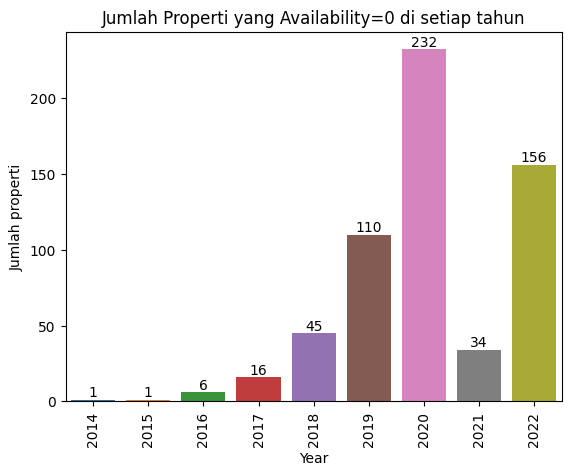

In [37]:
data_review_month = data_availability_0.groupby(data_availability_0['last_review'].dt.year)['number_of_reviews'].size()
data_review_month = data_review_month.reset_index()

data_review_month['last_review'] = pd.to_datetime(data_review_month['last_review'], format='%Y')

ax= sns.barplot(data=data_review_month,
            x=data_review_month['last_review'].dt.year,
            y='number_of_reviews',
            estimator=np.sum,
            ci=None)

plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('Jumlah properti')
plt.title('Jumlah Properti yang Availability=0 di setiap tahun')


# Add labels to each bar
for index, row in data_review_month.iterrows():
    ax.text(row.name, row.number_of_reviews, str(row.number_of_reviews), ha='center', va='bottom')

plt.show()

**Analisis**

Dari tahun ke tahun terjadi peningkatan jumlah properti yang tidak bisa disewa, puncaknya pada tahun 2020 yang pada tahun ini virus covid mulai masuk ke negara Thailand, jadi untuk mengurangi penyebaran dan takut tertular banyak pemilik properti yang tidak menyewakan propertinya, tetapi pada tahun 2022 yang mana virus covid sudah lumayan mereda, masih saja banyak properti yang tidak bisa disewa, dari kuantitas malah lebih banyak daripada tahun 2021.

# 4. Analisis Penurunan Jumlah Review

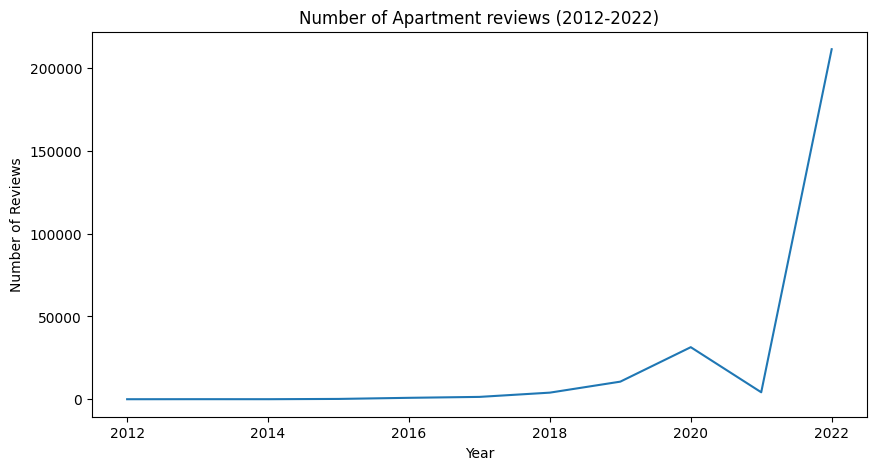

In [38]:
plt.figure(figsize=(10,5))
reviews_per_year = data.groupby(data['last_review'].dt.year)['number_of_reviews'].sum()
reviews_per_year.plot(x=reviews_per_year.index, y=reviews_per_year.values)
plt.title('Number of Apartment reviews (2012-2022)')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.show()

**Menggunakan data Pendukung (Jumlah pengunjung yang mengunjungi Thailand pada tahun 2019-2023)**

In [39]:
#Data Pendukung
df=pd.read_csv('thailand_domestic_tourism_2019_2023.csv')
df

,date,province_thai,province_eng,region_thai,region_eng,variable,value
0,2019-01-01,กรุงเทพมหานคร,Bangkok,ภาคกลาง,central,occupancy_rate,93.37
1,2019-01-01,ลพบุรี,Lopburi,ภาคกลาง,central,occupancy_rate,61.32
2,2019-01-01,พระนครศรีอยุธยา,Phra Nakhon Si Ayutthaya,ภาคกลาง,central,occupancy_rate,73.37
3,2019-01-01,สระบุรี,Saraburi,ภาคกลาง,central,occupancy_rate,67.33
4,2019-01-01,ชัยนาท,Chainat,ภาคกลาง,central,occupancy_rate,79.31
...,...,...,...,...,...,...,...
30795,2022-12-01,อุบลราชธานี,Ubon Ratchathani,ภาคตะวันออกเฉียงเหนือ,east_northeast,net_profit_foreign,2.48
30796,2022-12-01,สกลนคร,Sakon Nakhon,ภาคตะวันออกเฉียงเหนือ,east_northeast,net_profit_foreign,3.52
30797,2022-12-01,ยโสธร,Yasothon,ภาคตะวันออกเฉียงเหนือ,east_northeast,net_profit_foreign,0.21
30798,2022-12-01,อำนาจเจริญ,Amnat Charoen,ภาคตะวันออกเฉียงเหนือ,east_northeast,net_profit_foreign,0.66


**Informasi label pada kolom variabel**

_Variable is The 8 type of data being recorded, such as the number of tourists or the occupancy rate_.

- no_tourist_all          : The total number of domestic tourists who visited the province
- no_tourist_foreign      : The number of foreign tourists who visited the province
- no_tourist_occupied     : The total number of occupied hotel rooms in the province
- no_tourist_thai         : The number of Thai tourists who visited the province
- occupancy_rate          : The percentage of occupied travel accommodation in the province
- revenue_all             : The revenue generated by the tourism industry in the province, in Thai Baht
- revenue_foreign         : The revenue generated by foreign tourists in the province, in Thai Baht
- revenue_thai            : The revenue generated by Thai tourists in the province, in Thai Baht

In [40]:
#Mengecek type setiap kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30800 entries, 0 to 30799
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           30800 non-null  object 
 1   province_thai  30800 non-null  object 
 2   province_eng   30800 non-null  object 
 3   region_thai    30800 non-null  object 
 4   region_eng     30800 non-null  object 
 5   variable       30800 non-null  object 
 6   value          30800 non-null  float64
dtypes: float64(1), object(6)
memory usage: 1.6+ MB


In [41]:
#Mengecek missing value
df.isna().sum()

date             0
province_thai    0
province_eng     0
region_thai      0
region_eng       0
variable         0
value            0
dtype: int64

In [42]:
#Membuat dataframe baru, hanya mengselect provinsi Bangkok
df_bangkok=df[(df['province_eng']=='Bangkok')&((df['variable']=='no_tourist_thai')|(df['variable']=='no_tourist_foreign'))]
df_bangkok

#Pemilihan variabel no_tourist_thai dan no_tourist_foreign karena pada data ini hanya ingin mengetahui total jumlah pengunjung yang mengunjungi provinsi Bangkok,
#sehingga variabel lain diabaikan.

,date,province_thai,province_eng,region_thai,region_eng,variable,value
11550,2019-01-01,กรุงเทพมหานคร,Bangkok,ภาคกลาง,central,no_tourist_thai,3534061.0
11627,2020-01-01,กรุงเทพมหานคร,Bangkok,ภาคกลาง,central,no_tourist_thai,3573040.0
11704,2021-01-01,กรุงเทพมหานคร,Bangkok,ภาคกลาง,central,no_tourist_thai,1632693.0
11781,2022-01-01,กรุงเทพมหานคร,Bangkok,ภาคกลาง,central,no_tourist_thai,2299906.0
11858,2023-01-01,กรุงเทพมหานคร,Bangkok,ภาคกลาง,central,no_tourist_thai,2749877.0
...,...,...,...,...,...,...,...
18865,2022-11-01,กรุงเทพมหานคร,Bangkok,ภาคกลาง,central,no_tourist_foreign,1627034.0
18942,2019-12-01,กรุงเทพมหานคร,Bangkok,ภาคกลาง,central,no_tourist_foreign,2122842.0
19019,2020-12-01,กรุงเทพมหานคร,Bangkok,ภาคกลาง,central,no_tourist_foreign,64261.0
19096,2021-12-01,กรุงเทพมหานคร,Bangkok,ภาคกลาง,central,no_tourist_foreign,159637.0


In [43]:
#Mengubah format date menjadi datetime
# df_bangkok['date']=pd.to_datetime(df_bangkok['date'])

#Membuat kolom tahun
df_bangkok['Year']=df_bangkok['date'].apply(lambda x: str(x)[:4])

,Year,value
4,2023,9569732.0
2,2021,12571842.0
1,2020,23617914.0
3,2022,38626450.0
0,2019,66966562.0


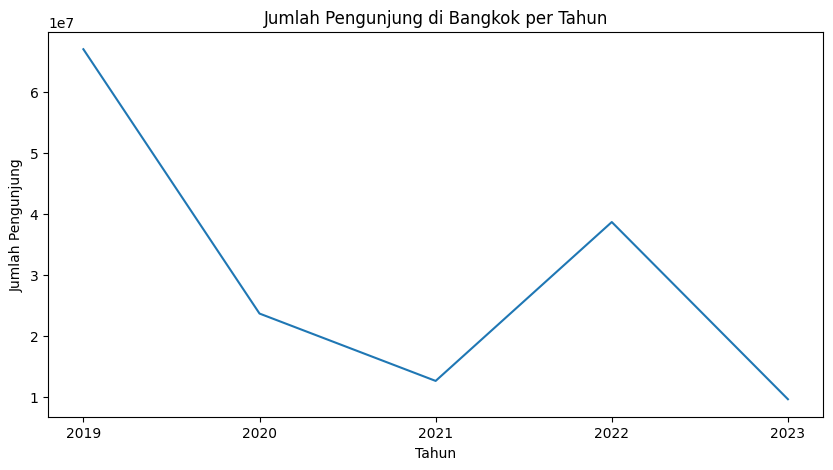

In [44]:
# Tren pengunjung yang mengunjungi Bangkok dari tahun 2019-2023
# Mengelompokkan data pengunjung berdasarkan tahun dan menjumlahkan jumlah pengunjung dalam setiap tahun

visitors_per_year = df_bangkok.groupby('Year')['value'].sum().reset_index()
display(visitors_per_year.sort_values('value'))

# Plot jumlah pengunjung per tahun
plt.figure(figsize=(10,5))
plt.plot(visitors_per_year['Year'], visitors_per_year['value'])
plt.xlabel('Tahun')
plt.ylabel('Jumlah Pengunjung')
plt.title('Jumlah Pengunjung di Bangkok per Tahun')
plt.show()


# Jumlah pengunjung 2023

In [45]:
df_bangkok[df_bangkok['Year']=='2023']

,date,province_thai,province_eng,region_thai,region_eng,variable,value,Year
11858,2023-01-01,กรุงเทพมหานคร,Bangkok,ภาคกลาง,central,no_tourist_thai,2749877.0,2023
12243,2023-02-01,กรุงเทพมหานคร,Bangkok,ภาคกลาง,central,no_tourist_thai,2540268.0,2023
15708,2023-01-01,กรุงเทพมหานคร,Bangkok,ภาคกลาง,central,no_tourist_foreign,2122201.0,2023
16093,2023-02-01,กรุงเทพมหานคร,Bangkok,ภาคกลาง,central,no_tourist_foreign,2157386.0,2023


**ANALISIS**

Pada tahun 2021 yang menulis review pada aplikasi Air BnB mengalami penurunan yang signifikan, ternyata setelah melihat data wisatawan yang mengunjungi Bangkok setiap tahun terdapat persamaan yaitu sama-sama turun, jadi bukan karena kepopuleran Air BnB yang mulai melemah namun karena jumlah pengunjung pada tahun 2021 lah yang sangat sedikit.

Selain tahun 2021 yang mengalami penurunan terdapat juga tahun 2023 yang grafiknya turun, namun bukan karena jumlah pengunjung di tahun 2023 yang sedikit tetapi karena tahun 2023 belum habis dan di data hanya tercatat sampai bulan 2 saja.

# 5. Analisis Jumlah Properti dan Review

<font color='pink'>Catatan:

Pada kasus ini jumlah ulasan akan dianggap berbanding lurus dengan jumlah wisatawan yang menyewa properti penginapan.

**PROPORSI TOTAL PROPERTI**

In [46]:
data_room=data['room_type'].value_counts()

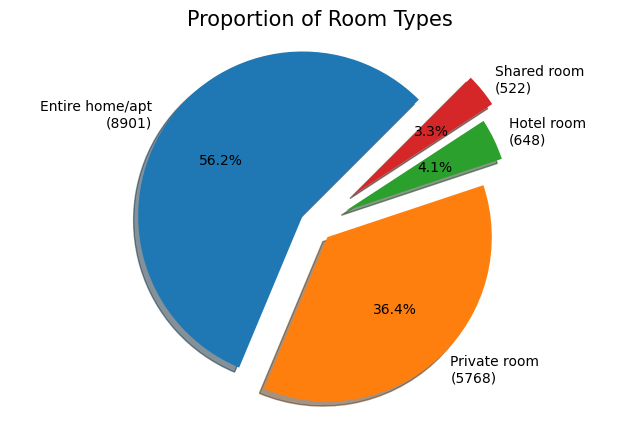

In [47]:
plt.figure(figsize=(8,5))
explode = (0.1, 0.1, 0.2, 0.3)
# Menggabungkan jumlah per tipe kamar ke dalam label persentase
labels = [f"{room_type}\n({count})" for room_type, count in zip(data_room.index, data_room)]
plt.pie(data_room,
        labels=labels, 
        autopct='%1.1f%%',shadow=bool,explode=explode,startangle = 45)
plt.title('Proportion of Room Types',size=15)
plt.axis('equal')  # Make the pie chart circular
plt.show()

**PROPORSI TOTAL REVIEW SETIAP TIPE PROPERTI**

In [48]:
data_room_type=data.groupby('room_type')[['number_of_reviews']].sum()
# data_room_type.sort_values('number_of_reviews',ascending=False)

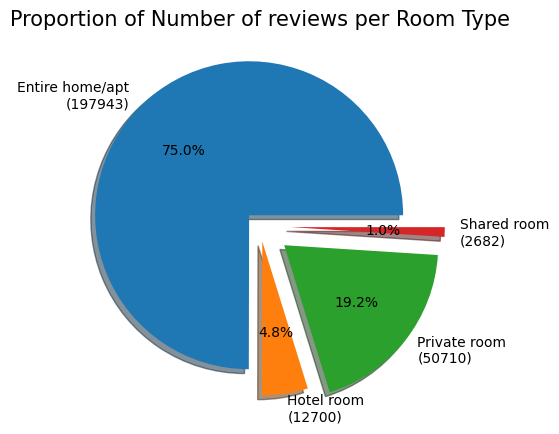

In [49]:
plt.figure(figsize=(8,5))
explode = (0.1, 0.1, 0.2, 0.2)
labels = [f"{number_of_reviews}\n({sum})" for number_of_reviews, sum in zip(data_room_type.index, data_room_type['number_of_reviews'])]
sizes = data_room_type['number_of_reviews'].values

plt.pie(sizes, labels=labels, autopct='%1.1f%%', explode=explode,shadow=bool)
plt.title('Proportion of Number of reviews per Room Type',size=15)
plt.show()



**ANALISIS**

Dapat dilihat pada jumlah properti yang tertinggi adalah apartemen/whole house sebesar 8901 dan ulasan yang didapatkan dari properti ini adalah 197943 atau 75% dari total ulasan keseluruhan properti. Namun, ada yang yang tidak wajar di properti hotel room dan private room, yaitu jenis properti private room yang berjumlah 5768 (36,4%) hanya memilki ulasan sebanyak 50710(19,2%) dan properti hotel room sebanyak 649 (4,1%) memiliki ulasan 12700(4,8%).

Properti private room lebih banyak 9x lipat daripada hotel room tapi ulasan yang didapa hanya 4x lebih banyak daripada hotel room.

Apa yang menyebabkan properti banyak tetapi ulasannya sedikit? 

# a. Mencari korelasi number of reviews dengan kolom lain

**MENGECEK NORMALITAS**

In [50]:
statistic, p_value = stats.shapiro(data['price'])
print(f'nilai statsistik: {statistic},nilai p_value: {p_value}')

nilai statsistik: 0.04443693161010742,nilai p_value: 0.0


**MENGECEK KORELASI**

<Axes: >

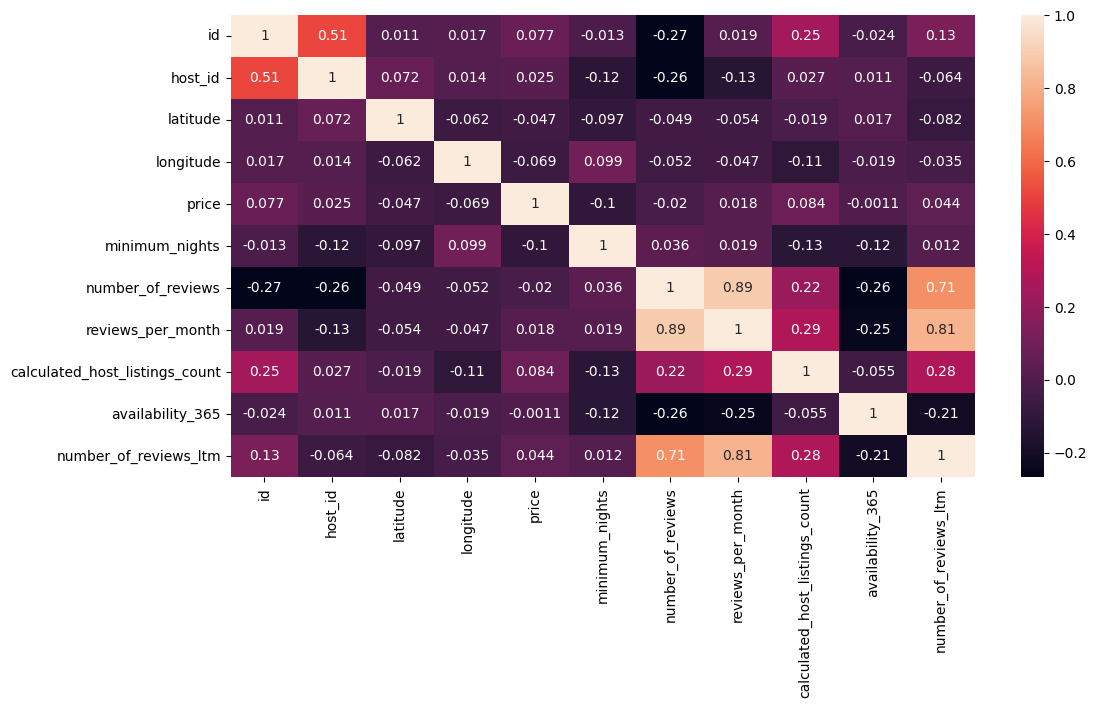

In [51]:
corr = data.corr(method='spearman')
plt.figure(figsize=(12,6))
sns.heatmap(corr, annot=True)

Setelah mengecek nilai korelasi number of reviews dengan kolom lain, ternyata yang memiliki korelasi tinggi hanya yang berhubungan dengan reviews yaitu reviews per month dan number of reviews ltm, selain itu tidak ada. Itulah mengapa mengetahui korelasi dengan cara statistika tidak bisa diterapkan, selanjutnya analisis yang akan dilakukan berfokus kepada mencari korelasi number of reviews berdasarkan domain knowledge.

# Tren Jumlah Review per Jenis Properti Setiap Tahun

In [52]:
years1 = ['2012-01-01', '2013-01-01', '2014-01-01', '2015-01-01', '2016-01-01'] 
data_review_month1 = data[data['last_review (Year)'].isin(years1)]
data_review_month1 = data_review_month1.groupby(['last_review (Year)', 'room_type'])[['number_of_reviews']].sum()
display(data_review_month1)

years2=['2017-01-01', '2018-01-01', '2019-01-01', '2020-01-01', '2021-01-01']
data_review_month2 = data[data['last_review (Year)'].isin(years2)]
data_review_month2 = data_review_month2.groupby(['last_review (Year)', 'room_type'])[['number_of_reviews']].sum()
display(data_review_month2)

years3=['2022-01-01']
data_review_month3 = data[data['last_review (Year)'].isin(years3)]
data_review_month3 = data_review_month3.groupby(['last_review (Year)', 'room_type'])[['number_of_reviews']].sum()
display(data_review_month3)

number_of_reviews
last_review (Year) room_type                         
2012-01-01         Entire home/apt                  4
2013-01-01         Entire home/apt                 28
                   Private room                     2
2014-01-01         Entire home/apt                  4
                   Private room                    12
2015-01-01         Entire home/apt                 91
                   Private room                    88
                   Shared room                      3
2016-01-01         Entire home/apt                624
                   Hotel room                       3
                   Private room                   205
                   Shared room                     20

number_of_reviews
last_review (Year) room_type                         
2017-01-01         Entire home/apt                843
                   Hotel room                      38
                   Private room                   442
                   Shared room                     84
2018-01-01         Entire home/apt               2446
                   Hotel room                     128
                   Private room                  1280
                   Shared room                    124
2019-01-01         Entire home/apt               5333
                   Hotel room                     897
                   Private room                  3840
                   Shared room                    546
2020-01-01         Entire home/apt              19682
                   Hotel room                    2259
                   Private room                  8870
                   Shared room                    612
2021-01-01         Entire home/apt               3770
                   Hotel room                     168
                   Private room                   256
                   Shared room                      5

number_of_reviews
last_review (Year) room_type                         
2022-01-01         Entire home/apt             165118
                   Hotel room                    9207
                   Private room                 35715
                   Shared room                   1288

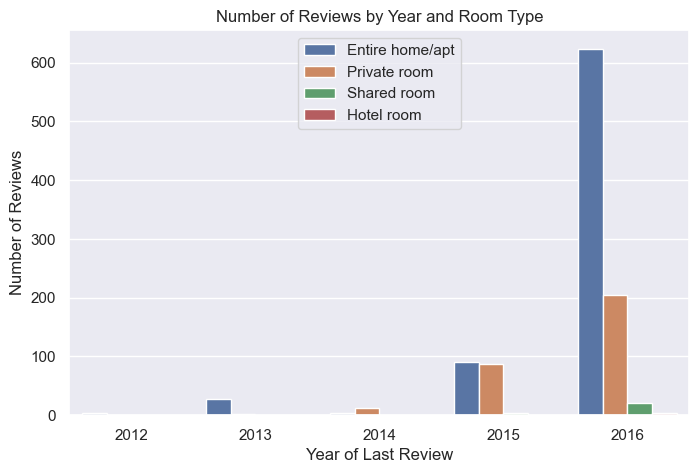

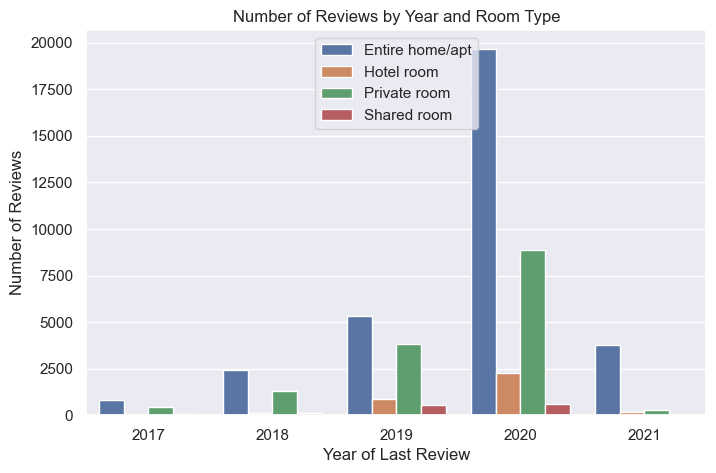

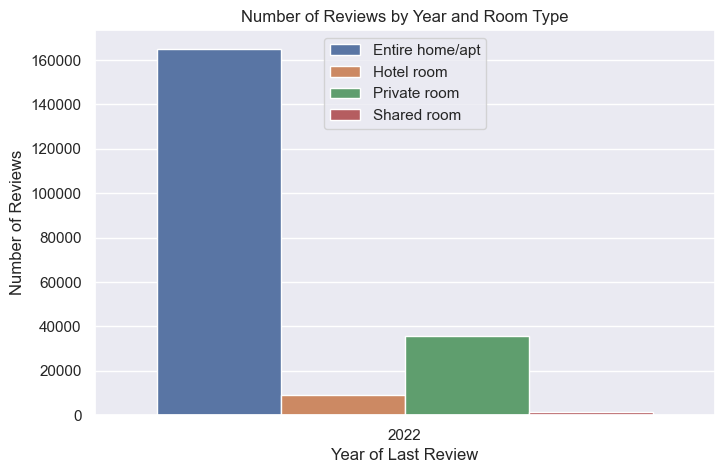

In [53]:
sns.set(style="darkgrid")
plt.figure(figsize=(8, 5))

data_review_month1.reset_index(inplace=True)

sns.barplot(x=data_review_month1['last_review (Year)'].dt.year,
            y="number_of_reviews",
            hue="room_type",
            data=data_review_month1)
plt.title("Number of Reviews by Year and Room Type")
plt.xlabel("Year of Last Review")
plt.ylabel("Number of Reviews")
plt.legend(loc='upper center')

plt.show()

sns.set(style="darkgrid")
plt.figure(figsize=(8, 5))

data_review_month2.reset_index(inplace=True)

sns.barplot(x=data_review_month2['last_review (Year)'].dt.year,
            y="number_of_reviews",
            hue="room_type",
            data=data_review_month2)
plt.title("Number of Reviews by Year and Room Type")
plt.xlabel("Year of Last Review")
plt.ylabel("Number of Reviews")
plt.legend(loc='upper center')

plt.show()

sns.set(style="darkgrid")
plt.figure(figsize=(8, 5))

data_review_month3.reset_index(inplace=True)

sns.barplot(x=data_review_month3['last_review (Year)'].dt.year,
            y="number_of_reviews",
            hue="room_type",
            data=data_review_month3)
plt.title("Number of Reviews by Year and Room Type")
plt.xlabel("Year of Last Review")
plt.ylabel("Number of Reviews")
plt.legend(loc='upper center')

plt.show()



Pada Tren jumlah ulasan pertahun, pada tahun 2018-2019, properti apartement dan private room menunjukan jumlah yang tidak terlalu jauh, namun mulai dari tanggal 2020 ulasan properti apartment meroket, dan puncaknya pada tahun 2022, ulasan apartement sangat meroket tajam meninggalkan private room dan properti lainnya.

Sebenernya apa yang terjadi pada tahun 2022 yang menyebabkan apartement memiliki banyak sekali ulasan???

Padahal jumlah properti nya hanya 1,5 kali lipat lebih banyak daripada private room.

# Analisis ketersediaan kamar dengan banyaknya ulasan yang didapat

**PRIVATE ROOM**

In [54]:
count_with_availability_P = df_private[df_private["availability_365"] != 0]["id"].count()
count_with_reviews_P = df_private[(df_private["availability_365"] != 0) & (df_private["number_of_reviews"] != 0)]["id"].count()

# Membuat tabel perbandingan
comparison_table = pd.DataFrame({
    'Jenis Data': ['Properti yang dapat disewa', 'Properti yang mendapat ulasan'],
    'Jumlah Properti': [count_with_availability_P, count_with_reviews_P]
})

display(comparison_table)


,Jenis Data,Jumlah Properti
0,Properti yang dapat disewa,5519
1,Properti yang mendapat ulasan,2696


**APARTEMENT**

In [55]:
count_with_availability_A= df_apart[(df_apart["availability_365"]!=0)]["id"].count()
count_with_reviews_A = df_apart[(df_apart["availability_365"]!=0)&(df_apart["number_of_reviews"]!=0)]["id"].count()

# Membuat tabel perbandingan
comparison_table = pd.DataFrame({
    'Jenis Data': ['Properti yang dapat disewa', 'Properti yang mendapat ulasan'],
    'Jumlah Properti': [count_with_availability_A, count_with_reviews_A]
})

display(comparison_table)


,Jenis Data,Jumlah Properti
0,Properti yang dapat disewa,8404
1,Properti yang mendapat ulasan,6180


**HOTEL ROOM**

In [56]:
count_with_availability_H= df_hotel[(df_hotel["availability_365"]!=0)]["id"].count()
count_with_reviews_H = df_hotel[(df_hotel["availability_365"]!=0)&(df_hotel["number_of_reviews"]!=0)]["id"].count()

# Membuat tabel perbandingan
comparison_table = pd.DataFrame({
    'Jenis Data': ['Properti yang dapat disewa', 'Properti yang mendapat ulasan'],
    'Jumlah Properti': [count_with_availability_H, count_with_reviews_H]
})

display(comparison_table)


,Jenis Data,Jumlah Properti
0,Properti yang dapat disewa,567
1,Properti yang mendapat ulasan,390


**SHARED ROOM**

In [57]:
count_with_availability_S= df_shared[(df_shared["availability_365"]!=0)]["id"].count()
count_with_reviews_S = df_shared[(df_shared["availability_365"]!=0)&(df_shared["number_of_reviews"]!=0)]["id"].count()

# Membuat tabel perbandingan
comparison_table = pd.DataFrame({
    'Jenis Data': ['Properti yang dapat disewa', 'Properti yang mendapat ulasan'],
    'Jumlah Properti': [count_with_availability_S, count_with_reviews_S]
})

display(comparison_table)


,Jenis Data,Jumlah Properti
0,Properti yang dapat disewa,507
1,Properti yang mendapat ulasan,197


In [58]:
data.isna().sum()

id                                   0
name                                 7
host_id                              0
host_name                            0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5775
reviews_per_month                    0
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
last_review (Year)                5775
dtype: int64

**PROPORSI JUMLAH PROPERTI DAN JUMLAH REVIEW**

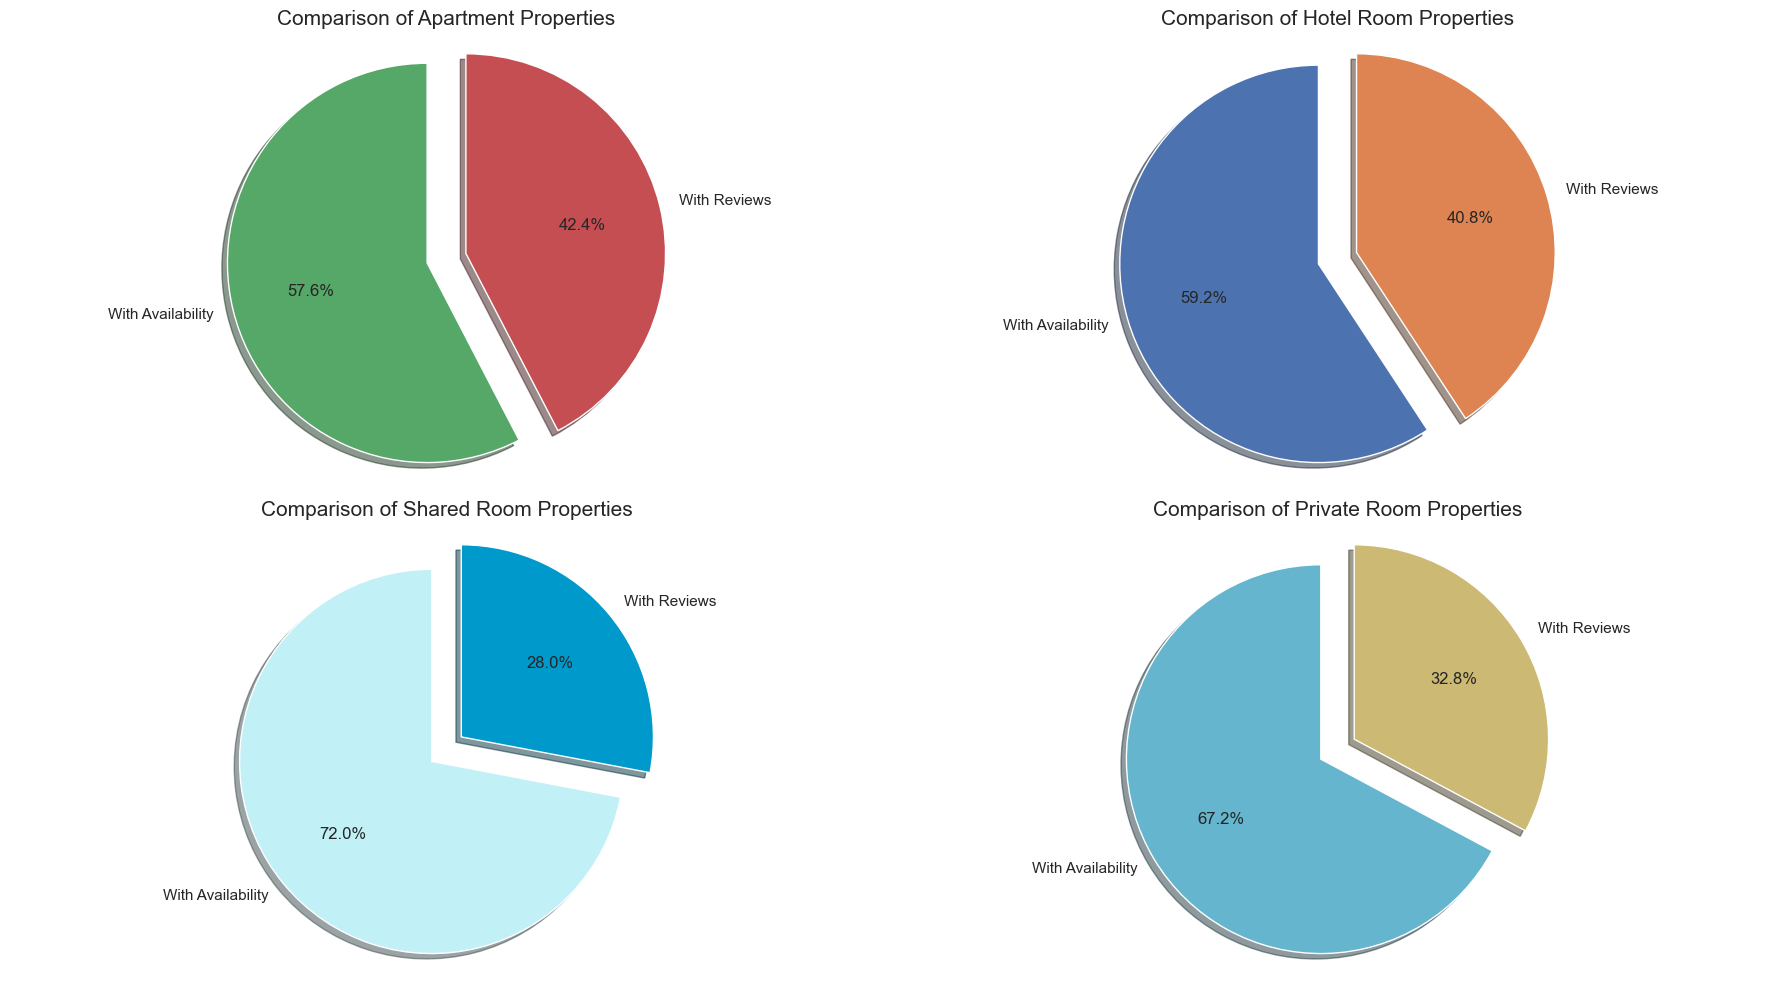

In [59]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 10))

# Grafik 1
labels = ['With Availability', 'With Reviews']
counts = [count_with_availability_A, count_with_reviews_A]
explode = [0.1, 0.1]

plt.subplot(2, 2, 1)  # Membuat subplot pertama dengan 2 baris, 2 kolom, dan indeks 1
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, explode=explode, shadow=True, colors='green')
plt.title("Comparison of Apartment Properties",size=15)
plt.axis('equal')

# Grafik 2
labels = ['With Availability', 'With Reviews']
counts = [count_with_availability_H, count_with_reviews_H]
explode = [0.1, 0.1]

plt.subplot(2, 2, 2)  # Membuat subplot kedua dengan 2 baris, 2 kolom, dan indeks 2
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, explode=explode, shadow=True)
plt.title("Comparison of Hotel Room Properties",size=15)
plt.axis('equal')

# Grafik 3
labels = ['With Availability', 'With Reviews']
counts = [count_with_availability_S, count_with_reviews_S]
explode = [0.1, 0.1]
cols = ['#C1F0F6', '#0099CC']

plt.subplot(2, 2, 3)  # Membuat subplot ketiga dengan 2 baris, 2 kolom, dan indeks 3
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, explode=explode, shadow=True, colors=cols)
plt.title("Comparison of Shared Room Properties",size=15)
plt.axis('equal')

# Grafik 4
labels = ['With Availability', 'With Reviews']
counts = [count_with_availability_P, count_with_reviews_P]
explode = [0.1, 0.1]

plt.subplot(2, 2, 4)  # Membuat subplot keempat dengan 2 baris, 2 kolom, dan indeks 4
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, explode=explode, shadow=True, colors='cyan')
plt.title("Comparison of Private Room Properties",size=15)
plt.axis('equal')

plt.tight_layout()  # Menyesuaikan tata letak subplot
plt.show()


In [60]:
data

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,last_review (Year)
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.759830,100.541340,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0,2020-01-01
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,NaT,0.00,2,358,0,NaT
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,NaT,0.00,1,365,0,NaT
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.788230,100.572560,Private room,1286,7,2,2022-04-01,0.03,1,323,1,2022-01-01
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,NaT,0.00,3,365,0,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaT,0.00,1,362,0,NaT
15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaT,0.00,14,365,0,NaT
15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaT,0.00,14,365,0,NaT
15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaT,0.00,14,365,0,NaT


**ANALISIS**


Dari grafik diatas, dapat dilihat bahwa properti dengan jenis private room dan shared room memiliki proporsi yang relatif rendah dalam hal jumlah ulasan dibandingkan dengan total keseluruhan properti.

- Properti dengan jenis private room hanya mendapatkan review sebesar 32.8% dari total keseluruhan properti. Ini berarti hanya sekitar 1/3 dari seluruh properti private room yang menerima ulasan.
- Properti dengan jenis shared room hanya mendapatkan review sebesar 28% dari total keseluruhan properti. Ini berarti hampir hanya 1/4 dari seluruh properti shared room yang menerima ulasan.

# Analisis Durasi Menginap

**APARTEMENT**

In [61]:
df_apart[(df_apart["availability_365"]!=0)&(df_apart["number_of_reviews"]!=0)].groupby('minimum_nights').agg({'id': 'count', 'number_of_reviews': 'sum'}).nlargest(10, 'id')


,id,number_of_reviews
minimum_nights,,
1,2115,80836
2,936,33126
30,606,14192
3,564,17002
28,356,8644
7,255,4580
5,254,5834
14,115,2950
4,105,3758


**PRIVATE ROOM**

In [62]:
df_private[(df_private["availability_365"]!=0)&(df_private["number_of_reviews"]!=0)].groupby('minimum_nights').agg({'id': 'count', 'number_of_reviews': 'sum'}).nlargest(10, 'id')

,id,number_of_reviews
minimum_nights,,
1,1862,34934
2,295,8380
30,155,1185
3,109,1159
7,67,450
5,34,288
4,30,491
14,23,180
28,22,322


**SHARED ROOM**

In [63]:
df_shared[(df_shared["availability_365"]!=0)&(df_shared["number_of_reviews"]!=0)].groupby('minimum_nights').agg({'id': 'count', 'number_of_reviews': 'sum'}).nlargest(10, 'id')

,id,number_of_reviews
minimum_nights,,
1,184,2422
2,10,216
3,1,1
5,1,13
7,1,4


**HOTEL ROOM**

In [64]:
df_hotel[(df_hotel["availability_365"]!=0)&(df_hotel["number_of_reviews"]!=0)].groupby('minimum_nights').agg({'id': 'count', 'number_of_reviews': 'sum'}).nlargest(10, 'id')

,id,number_of_reviews
minimum_nights,,
1,358,10607
2,18,718
28,6,159
3,4,7
5,2,60
60,1,1
113,1,94


**ANALISIS**

Dari data yang disediakan, terlihat bahwa penginapan dengan jumlah ulasan terbanyak adalah properti dengan minimal durasi menginap 1 hari. Properti ini umumnya dipilih oleh wisatawan transit atau mereka yang tidak yakin dengan penginapan yang mereka sewa. Dalam hal ini, jika mereka merasa tidak nyaman, mereka dapat dengan mudah mencari penginapan lain pada hari berikutnya.

Properti yang paling banyak mendapatkan ulasan adalah apartemen atau rumah\ (whole house) dengan total ulasan sebanyak 34.928. Selain itu, terdapat juga hotel yang, meskipun jumlah propertinya hanya 358, berhasil mendapatkan 10.607 ulasan. Meskipun kamar pribadi (private room) memiliki lebih banyak ulasan dibandingkan dengan kamar hotel (hotel room), perbandingannya tidak seimbang dengan jumlah properti yang tersedia. Jumlah properti kamar pribadi mencapai 1.861, sedangkan jumlah ulasan yang diterima tidak sebanding dengan jumlah tersebut.

Selain itu, apartemen dan hotel umumnya menyediakan lebih dari satu tempat tidur, sehingga memungkinkan wisatawan untuk menyewa penginapan tersebut bersama dengan beberapa teman, sehingga biaya penginapan dapat dibagi dan menjadi lebih terjangkau.

Namun, properti dengan fasilitas berbagi seperti kamar bersama (shared room) dan kamar pribadi (private room) tidak diminati sebanyak properti lainnya. Hal ini mungkin disebabkan oleh kurangnya privasi yang ditawarkan oleh jenis properti ini, di mana fasilitas harus dibagikan dengan orang asing.

Pernyataan yang memuat bahwa apartemen/entire home memiliki fasilitas yang lebih lengkap ditemukan pada penjelasan tentang masing-masing jenis properti pada laman Air BnB [berikut ini.](https://www.airbnb.com/help/article/5?locale=en&_set_bev_on_new_domain=1685440442_M2ZmOGRlNGU3MjE4#section-heading-0-0)

# Analisis Perbedaan Harga

**APARTEMENT**

In [65]:
df_apart[(df_apart["availability_365"]!=0)&(df_apart["neighbourhood"]=='Ratchathewi')].describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,6.290000e+02,6.290000e+02,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000
mean,2.445033e+17,1.794876e+08,13.752229,100.547857,2138.104928,19.314785,21.523052,0.710445,41.130366,254.804452,5.211447
std,3.388186e+17,1.340020e+08,0.002940,0.011857,1404.073442,41.398015,37.208718,0.958424,69.729657,113.814542,15.250189
min,2.793400e+04,1.204370e+05,13.748330,100.521340,500.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,3.113864e+07,5.216195e+07,13.750070,100.537010,1441.000000,2.000000,0.000000,0.000000,3.000000,149.000000,0.000000
50%,4.156420e+07,1.685941e+08,13.751170,100.554250,1632.000000,3.000000,4.000000,0.380000,12.000000,320.000000,1.000000
75%,6.795402e+17,2.648650e+08,13.754188,100.556390,2527.000000,28.000000,28.000000,1.000000,39.000000,357.000000,5.000000
max,7.894405e+17,4.917528e+08,13.763810,100.564790,17281.000000,365.000000,406.000000,7.830000,228.000000,365.000000,325.000000


**PRIVATE ROOM**

In [66]:
df_private[(df_private["availability_365"]!=0)&(df_private["neighbourhood"]=='Ratchathewi')].describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,3.170000e+02,3.170000e+02,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000
mean,1.679577e+17,1.947650e+08,13.754146,100.537869,5141.400631,6.466877,11.905363,0.338233,9.447950,282.082019,2.981073
std,3.072811e+17,1.340166e+08,0.003141,0.008285,29657.079747,32.664719,25.191869,0.671597,11.157161,104.601956,7.267904
min,8.117871e+06,1.161904e+06,13.748290,100.521350,420.000000,1.000000,0.000000,0.000000,1.000000,3.000000,0.000000
25%,2.497509e+07,6.974862e+07,13.751870,100.532260,1113.000000,1.000000,0.000000,0.000000,2.000000,178.000000,0.000000
50%,3.504244e+07,1.888174e+08,13.753706,100.537374,1443.000000,1.000000,1.000000,0.030000,6.000000,345.000000,0.000000
75%,4.351985e+07,2.709290e+08,13.755850,100.540580,2229.000000,1.000000,8.000000,0.320000,11.000000,364.000000,2.000000
max,7.904768e+17,4.915262e+08,13.764260,100.564072,300000.000000,365.000000,176.000000,6.120000,53.000000,365.000000,61.000000


**SHARED ROOM**

In [67]:
df_shared[(df_shared["availability_365"]!=0)&(df_shared["neighbourhood"]=='Ratchathewi')].describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,6.000000e+01,6.000000e+01,60.000000,60.000000,60.000000,60.0,60.000000,60.000000,60.000000,60.000000,60.000000
mean,1.085392e+16,1.184864e+08,13.753495,100.534397,1056.400000,1.0,8.650000,0.118500,11.666667,319.566667,0.550000
std,8.407411e+16,1.018858e+08,0.002085,0.004112,2809.132776,0.0,18.903703,0.211955,7.899081,73.970990,1.407305
min,4.123832e+06,7.472382e+06,13.748860,100.529300,346.000000,1.0,0.000000,0.000000,1.000000,88.000000,0.000000
25%,1.468979e+07,5.678285e+07,13.752120,100.531240,400.000000,1.0,0.000000,0.000000,6.000000,242.000000,0.000000
50%,2.864507e+07,6.783628e+07,13.752840,100.532465,477.500000,1.0,0.500000,0.010000,10.500000,362.000000,0.000000
75%,3.357527e+07,2.039112e+08,13.754385,100.536853,500.000000,1.0,9.250000,0.140000,14.250000,365.000000,1.000000
max,6.512352e+17,4.647000e+08,13.760090,100.547150,20895.000000,1.0,105.000000,1.080000,24.000000,365.000000,8.000000


**HOTEL ROOM**

In [68]:
df_hotel[(df_hotel["availability_365"]!=0)&(df_hotel["neighbourhood"]=='Ratchathewi')].describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,5.800000e+01,5.800000e+01,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000
mean,2.787825e+07,1.711487e+08,13.755110,100.537249,6872.551724,1.500000,35.862069,0.527931,9.482759,315.741379,3.189655
std,8.786736e+06,8.749196e+07,0.003749,0.006915,39186.517295,3.550389,61.035063,0.796161,6.537990,63.810454,10.908643
min,9.402281e+06,3.090854e+07,13.749020,100.522330,400.000000,1.000000,0.000000,0.000000,1.000000,94.000000,0.000000
25%,2.342896e+07,5.954621e+07,13.753245,100.531075,986.000000,1.000000,1.000000,0.020000,3.000000,317.750000,0.000000
50%,3.107492e+07,1.819477e+08,13.753740,100.538210,1497.000000,1.000000,8.000000,0.180000,9.000000,335.500000,0.000000
75%,3.547496e+07,2.616682e+08,13.758007,100.542412,2066.750000,1.000000,48.250000,0.670000,17.000000,357.750000,2.000000
max,3.630689e+07,2.668982e+08,13.763980,100.554950,300000.000000,28.000000,261.000000,3.120000,24.000000,365.000000,79.000000


**ANALISIS**

Berikut ini adalah analisis data mengenai rentang harga untuk empat jenis properti yang dapat disewa di daerah populer, yaitu Ratchathewi:

1. Apartemen: Terdapat 629 penginapan apartemen dengan rentang harga terendah 500 baht dan tertinggi 17.281 baht. Ketika melihat mean (rata-rata) dan median (nilai tengah), terdapat selisih hanya sebesar 500 baht, yang jika dirupiahkan sekitar 200 ribu rupiah.

2. Kamar Pribadi (Private Room): Terdapat 316 penginapan kamar pribadi dengan rentang harga terendah 420 baht dan tertinggi 300.000 baht. Namun, terdapat perbedaan yang signifikan antara mean dan median, yaitu sebesar 3.711 baht atau sekitar 1,6 juta rupiah. Hal ini menunjukkan bahwa harga kamar pribadi memiliki rentang yang sangat luas.

3. Kamar Bersama (Shared Room): Terdapat 60 penginapan kamar bersama dengan rentang harga terendah 345 baht dan tertinggi 20.895 baht. Perbedaan harga tidak terlalu besar, yaitu sebesar 579 baht atau sekitar 500 ribu rupiah dari mean (rata-rata) 1.056 baht dan median (nilai tengah) 477 baht.

4. Kamar Hotel (Hotel Room): Terdapat 58 penginapan kamar hotel dengan rentang harga terendah 400 baht dan tertinggi 300.000 baht. Terdapat perbedaan harga yang cukup besar, yaitu sebesar 5.375 baht atau sekitar 2,3 juta rupiah antara mean (rata-rata) 6.872 baht dan median (nilai tengah) 1.497 baht.

Berdasarkan nilai median dan mean, properti apartemen dan kamar bersama memiliki rentang harga yang tidak terlalu jauh satu sama lain dalam jenis properti yang sama. Sementara itu, properti kamar hotel dan kamar pribadi memiliki rentang harga yang sangat jauh dalam jenis properti yang sama.

Harapannya analisis ini memberikan gambaran tentang variasi harga pada jenis properti yang berbeda di daerah Ratchathewi.

___

# KESIMPULAN

1. Terdapat beberapa properti yang didaftarkan lebih dari satu kali dengan nama host yang berbeda. Hal ini dapat dikenali melalui kemiripan nama, koordinat geografis (latitude dan longitude), harga, tipe kamar, dan ulasan terakhir. Situasi ini mengakibatkan properti yang sebenarnya sama dapat dipesan oleh dua orang atau lebih pada tanggal yang sama, mengakibatkan tumpang tindih pemesanan. Dalam kasus ini, penyewa yang telah melakukan pemesanan dan membayar harga sewa mungkin akan menemui masalah saat tiba di tempat tujuan karena properti tersebut telah terisi.

2. Ketiadaan nama pada properti memiliki pengaruh yang signifikan terhadap tingkat kepercayaan calon penyewa. Hal ini terbukti dari adanya 7 penginapan yang tidak memiliki nama, di mana 6 dari penginapan tersebut tidak mendapatkan ulasan sama sekali. Ketiadaan nama pada properti ini memberikan kesan negatif pada calon penyewa dan dapat mempengaruhi keputusan mereka untuk menyewa. Calon penyewa mungkin akan berasumsi bahwa properti tersebut tidak dapat dipercaya atau bahkan dicurigai sebagai properti palsu. 
    
    Sementara 1 penginapan yang mendapatkan ulasan memiliki harga yang relatif lebih murah daripada penginapan dengan jenis dan tempat yang sama, sehingga meskipun tingkat kepercayaan terhadap penginapan tersebut rendah, harga yang lebih terjangkau dapat menjadi faktor yang mempengaruhi keputusan penyewa. 
3. Jumlah penginapan yang tidak dapat disewa mengalami peningkatan dari tahun ke tahun, mencapai puncaknya pada tahun 2021. Peningkatan ini terjadi terutama setelah negara Thailand mengkonfirmasi adanya virus corona pada bulan Januari tahun 2021. Namun, meskipun pada tahun 2022 situasi pandemi Covid-19 sudah mulai mereda, masih terdapat banyak properti yang tidak dapat disewa. Faktanya, jumlah properti yang tidak dapat disewa pada tahun 2022 justru lebih banyak dibandingkan dengan tahun 2021.
4. Penurunan jumlah ulasan pada tahun 2021 dipengaruhi oleh jumlah wisatawan yang mengunjungi negara Thailand pun juga mengalami penurunan, jadi bukan karena kepopuleran Air BnB yang mulai melemah namun karena jumlah pengunjung pada tahun 2021 lah yang sangat sedikit karena lagi lagi pada tahun ini seluruh negara terdampak covid sehingga terdapat kebijakan lockdown di berbagai negara.
5. Jumlah review sangat mempengaruhi perusahaan Air BnB dan pemilik properti karena ulasan akan memberikan informasi tentang pengalaman penyewa sebelumnya dan memberikan gambaran tentang kualitas properti yang ditawarkan sehingga dapat dilakukan evaluasi terhadap kekurangan yang ada. Jumlah review pada kasus ini akan dianggap berbanding lurus dengan jumlah wisatawan, jadi jumlah review dan jumlah wisatawan dipengaruhi oleh faktor-faktor yang sama dibawah ini:
    - Pengaruh fasilitas penginapan dan minimum night terhadap keputusan wisatawan untuk menginap dan memberikan review

        Wisatawan cenderung memilih menginap di apartemen atau hotel untuk jangka waktu yang pendek. Hal ini dikarenakan apartemen dan hotel menyediakan ruangan terpisah, seperti kamar tidur, ruang tamu, dan dapur. Dengan tinggal di apartemen atau hotel, wisatawan tidak perlu berbagi ruangan atau fasilitas dengan orang asing lainnya, sehingga privasi mereka lebih terjamin.
        
    - Perbedaan rentang harga properti

        Properti apartemen dan kamar bersama memiliki rentang harga yang relatif serupa dalam jenis properti yang sama. Di sisi lain, properti kamar hotel dan kamar pribadi memiliki rentang harga yang sangat berbeda dalam jenis properti yang sama. Wisatawan dapat menggunakan informasi ini untuk mempertimbangkan preferensi mereka, seperti tingkat kenyamanan dan fasilitas yang diinginkan, sebelum membuat keputusan mengenai penginapan. Apabila rentang harga tidak terlalu jauh antara properti yang sejenis, wisatawan akan lebih mudah dalam memilih penginapan yang sesuai dengan kebutuhan dan anggaran mereka.




___

# REKOMENDASI

1. Pada saat registrasi listing penginapan pada aplikasi Air BnB, perlu dilakukan validasi yang lebih ketat, lalu memastikan bahwa setiap properti yang terdaftar adalah unik dan tidak ada duplikasi.
2. Platform Air BnB harus menerapkan peraturan registrasi yang mewajibkan host mengisi nama penginapan yang jelas dan menarik sebagai upaya mendapatkan ulasan dari penyewa sebelumnya.
3. Penginapan yang belum dapat disewa sebaiknya diberikan penangguhan dan peringatan. Jika dalam jangka waktu 2-3 tahun penginapan tersebut masih belum dapat beroperasi, maka sebaiknya aplikasi menghapus penginapan tersebut secara otomatis dari daftar listing di platform AirBnB. Namun juga dengan mempertimbangkan faktor-faktor yang relevan seperti histori penginapan, ulasan pengguna, dan komunikasi dengan pemilik penginapan. Dengan demikian, langkah ini dapat membantu menjaga kualitas dan keandalan layanan yang ditawarkan oleh platform AirBnB.
4. Cara meningkatkan ulasan:

    Promosi: 
    Pastikan properti tersebut memiliki eksposur yang cukup di sosial media populer seperti tiktok dan instagram, bahkan bisa juga dengan menyewa para tiktoker dan selebgram yang berkutat di dunia traveling sehingga memiliki visibilitas tinggi, dan semakin banyak wisatawan yang menggunakan Air BnB.

    Insentif ulasan: 
    Ketika promosi sudah semakin gencar dilakukan maka langkah selanjutnya adalah memberikan insentif kepada pengguna untuk menarik ulasan, seperti diskon atau poin reward.

    Menambah fasilitas:
        
    - Untuk mengatasi fasilitas yang kurang seperti penginapan yang hanya memiliki 1 bedroom, penginapan tersebut bisa memberikan penambahan harga yang tidak terlalu tinggi untuk menyewakan kasur tambahan.

    - Untuk properti yang memiliki minimum night 1 malam, namun jarang mendapatkan ulasan, bisa menambahkan fasilitas antar-jemput, resepsionis yang ramah, dan menjaga kebersihan penginapan, sehingga wisatawan terdorong untuk meninggalkan ulasan.

    Memberikan fitur refund:
    
    Pada properti yang memiliki harga tinggi, sebaiknya aplikasi mewajibkan penyewa menggunakan fitur refund, sehingga wisatawan tidak terlalu khawatir uangnya akan hilang terlalu banyak apabila terjadi pembatalan tiba-tiba.

